# Genbank file - matrix - make fasta file - phylogenetic tree(prank) (with definition fuction) (remove IR ver.)

## From genbank file,  make dataframe and fasta file after remove Inverted Repeat(IR) with definition fuction 

https://warwick.ac.uk/fac/sci/moac/people/students/peter_cock/python/genbank/

In [1]:
#genbank file 불러올때 사용
from Bio import SeqIO
#fasta file만들때 사용
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import pandas as pd
#dataframe merge
from functools import reduce
#그림 그릴때 사용
from Bio import Phylo
import matplotlib # pip3 install matplotlib
import matplotlib.pyplot as plt

In [2]:
# get all sequence records for the specified genbank file
t_gb_parse = [t_file for t_file in SeqIO.parse("gb file/tomato.gb", "genbank")]

In [3]:
for t_gb in t_gb_parse:
    print(t_gb.features[0:5])

[SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(155461), strand=1), type='source'), SeqFeature(CompoundLocation([FeatureLocation(ExactPosition(71635), ExactPosition(71749), strand=-1), FeatureLocation(ExactPosition(99238), ExactPosition(100032), strand=-1)], 'join'), type='gene', location_operator='join'), SeqFeature(CompoundLocation([FeatureLocation(ExactPosition(71635), ExactPosition(71749), strand=-1), FeatureLocation(ExactPosition(99800), ExactPosition(100032), strand=-1), FeatureLocation(ExactPosition(99238), ExactPosition(99264), strand=-1)], 'join'), type='CDS', location_operator='join'), SeqFeature(FeatureLocation(ExactPosition(2), ExactPosition(77), strand=-1), type='gene'), SeqFeature(FeatureLocation(ExactPosition(2), ExactPosition(77), strand=-1), type='tRNA')]


In [4]:
# 응용할 코드

def index_genbank_features(gb_record, feature_type, qualifier) :
    answer = dict()
    for (index, feature) in enumerate(gb_record.features) :
        if feature.type==feature_type :
            if qualifier in feature.qualifiers :
                #There should only be one locus_tag per feature, but there
                #are usually several db_xref entries
                for value in feature.qualifiers[qualifier] :
                    if value in answer :
                        print("WARNING - Duplicate key %s for %s features %i and %i" \
                           % (value, feature_type, answer[value], index))
                    else :
                        answer[value] = index
    return answer

In [5]:
index_genbank_features(t_gb, 'CDS', 'gene')

# WARNING 부분이 IR을 나타내어 줌 (어떤 gene이 어느 feature index에 위치하는지)

WARNING - Duplicate key rps12 for CDS features 2 and 153
WARNING - Duplicate key rps7 for CDS features 216 and 287
WARNING - Duplicate key ndhB for CDS features 212 and 289
WARNING - Duplicate key ycf15 for CDS features 208 and 295
WARNING - Duplicate key ycf2 for CDS features 206 and 297
WARNING - Duplicate key rpl23 for CDS features 202 and 301
WARNING - Duplicate key rpl2 for CDS features 198 and 303


{'rps12': 2,
 'psbA': 6,
 'matK': 10,
 'rps16': 14,
 'psbK': 20,
 'psbI': 22,
 'atpA': 32,
 'atpF': 34,
 'atpH': 38,
 'atpI': 40,
 'rps2': 42,
 'rpoC2': 44,
 'rpoC1': 46,
 'rpoB': 50,
 'petN': 54,
 'psbM': 56,
 'psbD': 66,
 'psbC': 68,
 'psbZ': 72,
 'rps14': 78,
 'psaB': 80,
 'psaA': 82,
 'ycf3': 84,
 'rps4': 91,
 'ndhJ': 101,
 'ndhK': 103,
 'ndhC': 105,
 'atpE': 113,
 'atpB': 115,
 'rbcL': 117,
 'accD': 119,
 'psaI': 121,
 'ycf4': 123,
 'cemA': 125,
 'petA': 127,
 'psbJ': 129,
 'psbL': 131,
 'psbF': 133,
 'psbE': 135,
 'petL': 137,
 'petG': 139,
 'psaJ': 145,
 'rpl33': 147,
 'rps18': 149,
 'rpl20': 151,
 'clpP': 155,
 'psbB': 160,
 'psbT': 162,
 'psbN': 164,
 'psbH': 166,
 'petB': 168,
 'petD': 172,
 'rpoA': 176,
 'rps11': 178,
 'rpl36': 180,
 'infA': 182,
 'rps8': 184,
 'rpl14': 186,
 'rpl16': 188,
 'rps3': 192,
 'rpl22': 194,
 'rps19': 196,
 'rpl2': 198,
 'rpl23': 202,
 'ycf2': 206,
 'ycf15': 208,
 'ndhB': 212,
 'rps7': 216,
 'ndhF': 239,
 'rpl32': 241,
 'ccsA': 245,
 'ndhD': 247,
 

In [6]:
print(t_gb.features[2].qualifiers['gene'])
print(t_gb.features[153].qualifiers['gene'])

# WARNING의 index를 참조해 gene name을 보니 동일한 gene이 맞다

['rps12']
['rps12']


In [7]:
print(t_gb.features[2])
print(t_gb.features[153])

# 동일한 gene의 feature를 print해보니 동일한 sequence가 각각 다른 위치에 존재함을 볼 수 있음

type: CDS
location: join{[71635:71749](-), [99800:100032](-), [99238:99264](-)}
qualifiers:
    Key: codon_start, Value: ['1']
    Key: gene, Value: ['rps12']
    Key: product, Value: ['ribosomal protein S12']
    Key: protein_id, Value: ['ABC56347.1']
    Key: trans_splicing, Value: ['']
    Key: transl_table, Value: ['11']
    Key: translation, Value: ['MPTIKQLIRNTRQPIRNVTKSPALRGCPQRRGTCTRVYTITPKKPNSALRKVARVRLTSGFEITAYIPGIGHNSQEHSVVLVRGGRVKDLPGVRYHIVRGTLDAVGVKDRQQGRSKYGVKKPK']

type: CDS
location: join{[71635:71749](-), [141305:141537](+), [142073:142099](+)}
qualifiers:
    Key: codon_start, Value: ['1']
    Key: gene, Value: ['rps12']
    Key: product, Value: ['ribosomal protein S12']
    Key: protein_id, Value: ['ABC56360.1']
    Key: trans_splicing, Value: ['']
    Key: transl_table, Value: ['11']
    Key: translation, Value: ['MPTIKQLIRNTRQPIRNVTKSPALRGCPQRRGTCTRVYTITPKKPNSALRKVARVRLTSGFEITAYIPGIGHNSQEHSVVLVRGGRVKDLPGVRYHIVRGTLDAVGVKDRQQGRSKYGVKKPK']



In [8]:
# 위의 def 코드 응용

CDS_dic = {}
IR_list = []

for t_gb in t_gb_parse :
    for (index, feature) in enumerate(t_gb.features) :
        if feature.type == 'CDS' :
            for value in feature.qualifiers['gene'] :
                if value in CDS_dic :
                    IR_list.append(value)
                else :
                    CDS_dic[value] = index

In [9]:
IR_list

# 위의 def 코드에서 print결과값에 있던 warning 부분의 gene들이 모두 모임

['rps12', 'rps7', 'ndhB', 'ycf15', 'ycf2', 'rpl23', 'rpl2']

In [10]:
for t_gb in t_gb_parse :
    for (index, feature) in enumerate(t_gb.features[0:5]) :
        print(index, feature)
        
# type 앞에 index 숫자가 붙었고, feature 들이 나열되어 짐
# 이 feature들 중 type이 CDS인 것만 거르고 CDS_dic에 gene이 key, index가 value의 쌍을 갖도록 하고, 이미 dictionary에 있는 gene이면 IR임을 이용해 IR을 찾아내는 것

0 type: source
location: [0:155461](+)
qualifiers:
    Key: cultivar, Value: ['LA3023']
    Key: db_xref, Value: ['taxon:4081']
    Key: mol_type, Value: ['genomic DNA']
    Key: note, Value: ['common: tomato; authority: Lycopersicon esculentum (L.)']
    Key: organelle, Value: ['plastid:chloroplast']
    Key: organism, Value: ['Solanum lycopersicum']
    Key: specimen_voucher, Value: ['Clemson University Genomics Institute']

1 type: gene
location: join{[71635:71749](-), [99238:100032](-)}
qualifiers:
    Key: gene, Value: ['rps12']
    Key: trans_splicing, Value: ['']

2 type: CDS
location: join{[71635:71749](-), [99800:100032](-), [99238:99264](-)}
qualifiers:
    Key: codon_start, Value: ['1']
    Key: gene, Value: ['rps12']
    Key: product, Value: ['ribosomal protein S12']
    Key: protein_id, Value: ['ABC56347.1']
    Key: trans_splicing, Value: ['']
    Key: transl_table, Value: ['11']
    Key: translation, Value: ['MPTIKQLIRNTRQPIRNVTKSPALRGCPQRRGTCTRVYTITPKKPNSALRKVARVRLTSGFE

In [11]:
CDS_dic 

#위의 def 코드의 answer dictionary 결과값과 비교해보니 동일, IR은 index값이 빠른 한 쌍만 존재

{'rps12': 2,
 'psbA': 6,
 'matK': 10,
 'rps16': 14,
 'psbK': 20,
 'psbI': 22,
 'atpA': 32,
 'atpF': 34,
 'atpH': 38,
 'atpI': 40,
 'rps2': 42,
 'rpoC2': 44,
 'rpoC1': 46,
 'rpoB': 50,
 'petN': 54,
 'psbM': 56,
 'psbD': 66,
 'psbC': 68,
 'psbZ': 72,
 'rps14': 78,
 'psaB': 80,
 'psaA': 82,
 'ycf3': 84,
 'rps4': 91,
 'ndhJ': 101,
 'ndhK': 103,
 'ndhC': 105,
 'atpE': 113,
 'atpB': 115,
 'rbcL': 117,
 'accD': 119,
 'psaI': 121,
 'ycf4': 123,
 'cemA': 125,
 'petA': 127,
 'psbJ': 129,
 'psbL': 131,
 'psbF': 133,
 'psbE': 135,
 'petL': 137,
 'petG': 139,
 'psaJ': 145,
 'rpl33': 147,
 'rps18': 149,
 'rpl20': 151,
 'clpP': 155,
 'psbB': 160,
 'psbT': 162,
 'psbN': 164,
 'psbH': 166,
 'petB': 168,
 'petD': 172,
 'rpoA': 176,
 'rps11': 178,
 'rpl36': 180,
 'infA': 182,
 'rps8': 184,
 'rpl14': 186,
 'rpl16': 188,
 'rps3': 192,
 'rpl22': 194,
 'rps19': 196,
 'rpl2': 198,
 'rpl23': 202,
 'ycf2': 206,
 'ycf15': 208,
 'ndhB': 212,
 'rps7': 216,
 'ndhF': 239,
 'rpl32': 241,
 'ccsA': 245,
 'ndhD': 247,
 

In [12]:
# del dic['']
# dictionary의 지우고싶은 key와 value 쌍을 key값 입력시 지워주는 기능을 이용해 IR을 없앨 계획

In [13]:
# 어떤 흐름으로 할지 틀을 짜봄

def make_df_without_IR_test(genbank_file_root) :
    gb_parse = [file for file in SeqIO.parse(genbank_file_root, "genbank")]
    
    index_dic = {}
    CDS_dic = {}
    IR_list = []
    
    name = genbank_file_root.split('/')[-1].split('.gb')[0]
    for gb in gb_parse :
        for (index, feature) in enumerate(gb.features) :
            if feature.type == 'CDS' :
                for value in feature.qualifiers['gene'] :
                    if value in index_dic :
                        IR_list.append(value)
                    else :
                        index_dic[value] = index
                        
        feats = [feat for feat in gb.features if feat.type == "CDS"]
        for feat in feats :
            try :
                key = feat.qualifiers['gene'][0]
                value = str(feat.location.extract(parent_sequence = gb.seq).translate(table=11, to_stop=True))
                CDS_dic[key] = value
            except KeyError :
                pass
    
    for IR in IR_list :
        del CDS_dic[IR]
            
    df_CDS = pd.DataFrame(list(CDS_dic.items()), columns=['Gene name', '%s'%name])
    return(df_CDS)

In [14]:
df_t_CDS_test = make_df_without_IR_test('./gb file/tomato.gb')

In [15]:
df_t_CDS_test.head()

,Gene name,tomato
0,psbA,MTAILERRESESLWGRFCNWITSTENRLYIGWFGVLMIPTLLTATS...
1,matK,MEEIHRYLQPDSSQQHNFLYPLIFQEYIYALAQDHGLNRNRSILLE...
2,rps16,MVKLRLKRCGRKQRAVYRIVAIDVRSRREGKDLQKVGFYDPIKNQT...
3,psbK,MLNTFSLIGICLNSTLYSSSFFFGKLPEAYAFLNPIVDIMPVIPLF...
4,psbI,MLTLKLFVYTVVIFFVSLFIFGFLSNDPGRNPGREE


In [16]:
df_t_CDS_test.shape

# 3_Use_the_genbank_file_with_def 편을 참조하면, IR을 없애기전 tomato의 dataframe shape는 (80, 2)이었음
# IR_list의 7개 모두가 삭제되었다고 예상해볼 수 있음

(73, 2)

In [17]:
test_m_IR = df_t_CDS_test['Gene name'] == 'rps12'

In [18]:
df_t_CDS_test['Gene name'][test_m_IR]

Series([], Name: Gene name, dtype: object)

In [19]:
test_m_gene = df_t_CDS_test['Gene name'] == 'psbA'

In [20]:
df_t_CDS_test['Gene name'][test_m_gene]

0    psbA
Name: Gene name, dtype: object

In [21]:
# IR이 성공적으로 지워졌음을 볼 수 있다

In [22]:
# 코드 다듬기

def make_df_without_IR(genbank_file_root) :
    gb_parse = [file for file in SeqIO.parse(genbank_file_root, "genbank")]
    
    CDS_dic = {}
    IR_list = []
    
    name = genbank_file_root.split('/')[-1].split('.gb')[0]
    for gb in gb_parse :
        for feature in gb.features :
            if feature.type == 'CDS' :
                for gene in feature.qualifiers['gene'] :
                    if gene in CDS_dic :
                        IR_list.append(gene)
                    else :
                        try :
                            CDS_dic[gene] = str(feature.location.extract(parent_sequence = gb.seq).translate(table=11, to_stop=True))
                        except KeyError :
                            pass
                        
    for IR in IR_list :
        del CDS_dic[IR]
        
    df_CDS = pd.DataFrame(list(CDS_dic.items()), columns=['Gene name', '%s'%name])
    return(df_CDS)

In [23]:
df_t_CDS = make_df_without_IR('./gb file/tomato.gb')

In [24]:
df_t_CDS.head()

,Gene name,tomato
0,psbA,MTAILERRESESLWGRFCNWITSTENRLYIGWFGVLMIPTLLTATS...
1,matK,MEEIHRYLQPDSSQQHNFLYPLIFQEYIYALAQDHGLNRNRSILLE...
2,rps16,MVKLRLKRCGRKQRAVYRIVAIDVRSRREGKDLQKVGFYDPIKNQT...
3,psbK,MLNTFSLIGICLNSTLYSSSFFFGKLPEAYAFLNPIVDIMPVIPLF...
4,psbI,MLTLKLFVYTVVIFFVSLFIFGFLSNDPGRNPGREE


In [25]:
df_t_CDS.shape

(73, 2)

In [26]:
m_IR = df_t_CDS['Gene name'] == 'rps12'

In [27]:
df_t_CDS['Gene name'][m_IR]

Series([], Name: Gene name, dtype: object)

In [28]:
m_gene = df_t_CDS['Gene name'] == 'psbA'

In [29]:
df_t_CDS['Gene name'][m_gene]

0    psbA
Name: Gene name, dtype: object

In [30]:
# IR 지우기 성공!

In [33]:
df_p_CDS = make_df_without_IR('./gb file/P.patens.gb')

# 2_Use_the_genbank_file에서 보았듯이, '/gene="rps7"'과 같이 표기되어 있는 것이 아닌 '/note="trans splicing 5'rps12 and 3'rps12"' 로 표기되어 있는 것도 있음, 이러한 부분때문에 error 발생

KeyError: 'gene'

In [34]:
# 코드 다시 다듬기
def make_df_without_IR(genbank_file_root) :
    gb_parse = [file for file in SeqIO.parse(genbank_file_root, "genbank")]
    
    CDS_dic = {}
    IR_list = []
    
    name = genbank_file_root.split('/')[-1].split('.gb')[0]
    for gb in gb_parse :
        for feature in gb.features :
            if feature.type == 'CDS' :
                try :
                    for gene in feature.qualifiers['gene'] :
                        if gene in CDS_dic :
                            IR_list.append(gene)
                        else :
                            CDS_dic[gene] = str(feature.location.extract(parent_sequence = gb.seq).translate(table=11, to_stop=True))
                except KeyError :
                    pass
                        
    for IR in IR_list :
        del CDS_dic[IR]
        
    df_CDS = pd.DataFrame(list(CDS_dic.items()), columns=['Gene name', '%s'%name])
    return(df_CDS)

In [35]:
df_p_CDS = make_df_without_IR('./gb file/P.patens.gb')

# error 없이 잘 작동!

In [69]:
# 3_Use_the_genbank_file_with_def 편에 만들었던 dataframe shape와 IR이 없어진 dataframe shape를 비교해보고 싶어 IR_list의 gene 이름과 gene 갯수도 print도 하게 해줌

def make_df_without_IR_print(genbank_file_root) :
    gb_parse = [file for file in SeqIO.parse(genbank_file_root, "genbank")]
    
    CDS_dic = {}
    IR_list = []
    
    name = genbank_file_root.split('/')[-1].split('.gb')[0]
    for gb in gb_parse :
        for feature in gb.features :
            if feature.type == 'CDS' :
                try :
                    for gene in feature.qualifiers['gene'] :
                        if gene in CDS_dic :
                            IR_list.append(gene)
                        else :
                            CDS_dic[gene] = str(feature.location.extract(parent_sequence = gb.seq).translate(table=11, to_stop=True))
                except KeyError :
                    pass
    
    print('IR list : %s'%(IR_list))
    print('The number of IR : %i'%(len(IR_list)))
    
    for IR in IR_list :
        del CDS_dic[IR]
        
    df_CDS = pd.DataFrame(list(CDS_dic.items()), columns=['Gene name', '%s'%name])
    return(df_CDS)

In [70]:
df_t_CDS = make_df_without_IR_print('./gb file/tomato.gb')

IR list : ['rps12', 'rps7', 'ndhB', 'ycf15', 'ycf2', 'rpl23', 'rpl2']
The number of IR : 7


In [71]:
df_t_CDS.head()

# IR_list의 gene 이름과 갯수는 print만 해준 것이고 def의 return값은 df이므로, 변수에 지정된건 df뿐임을 알 수 있음

,Gene name,tomato
0,psbA,MTAILERRESESLWGRFCNWITSTENRLYIGWFGVLMIPTLLTATS...
1,matK,MEEIHRYLQPDSSQQHNFLYPLIFQEYIYALAQDHGLNRNRSILLE...
2,rps16,MVKLRLKRCGRKQRAVYRIVAIDVRSRREGKDLQKVGFYDPIKNQT...
3,psbK,MLNTFSLIGICLNSTLYSSSFFFGKLPEAYAFLNPIVDIMPVIPLF...
4,psbI,MLTLKLFVYTVVIFFVSLFIFGFLSNDPGRNPGREE


In [72]:
df_t_CDS.shape

# 3편의 df_t_CDS.shape = (80, 2)

(73, 2)

In [73]:
df_a_CDS = make_df_without_IR_print('./gb file/A.thaliana.gb')

IR list : ['rps12', 'rps7', 'ndhB', 'ycf2', 'rpl23', 'rpl2']
The number of IR : 6


In [74]:
df_a_CDS.shape

# 3편의 df_a_CDS.shape = (77, 2)

(71, 2)

In [75]:
df_p_CDS = make_df_without_IR_print('./gb file/P.patens.gb')

IR list : []
The number of IR : 0


In [76]:
df_p_CDS.shape

# 3편의 df_p_CDS.shape = (84, 2) : IR이 없었음을 알 수 있음

(84, 2)

In [77]:
df_g_CDS = make_df_without_IR_print('./gb file/G.max.gb')

IR list : ['ycf1', 'rps7', 'ndhB', 'ycf2', 'rpl23', 'rpl2']
The number of IR : 6


In [78]:
df_g_CDS.shape

# 3편의 df_g_CDS.shape = (76, 2)

(70, 2)

In [79]:
df_o_CDS = make_df_without_IR_print('./gb file/oryza sativa.gb')

IR list : ['ndhH', 'rps15', 'orf63', 'orf39', 'orf23', 'rps7', 'ndhB', 'orf222', 'orf64', 'orf28', 'orf34', 'orf46', 'rpl23', 'rpl2', 'rps19']
The number of IR : 15


In [80]:
df_o_CDS.shape

# 3편의 df_o_CDS.shape = (85, 2)

(70, 2)

In [81]:
df_s_CDS = make_df_without_IR_print('./gb file/S.polyrhiza.gb')

IR list : ['rps15', 'ycf1', 'rps7', 'ndhB', 'ycf2', 'rpl23', 'rpl2']
The number of IR : 7


In [82]:
df_s_CDS.shape

# 3편의 df_s_CDS.shape = (78, 2)

(71, 2)

In [83]:
df_sv_CDS = make_df_without_IR_print('./gb file/S.viridis.gb')

IR list : ['rps12', 'rps15', 'ycf68', 'rps7', 'ndhB', 'rpl23', 'rpl2', 'rps19']
The number of IR : 8


In [84]:
df_sv_CDS.shape

# 3편의 df_sv_CDS.shape = (77, 2)

(69, 2)

In [85]:
df_l_CDS = make_df_without_IR_print('./gb file/L.sativa.gb')

IR list : ['rps12', 'rps7', 'ndhB', 'ycf2', 'rpl23', 'rpl2']
The number of IR : 6


In [86]:
df_l_CDS.shape

# 3편의 df_l_CDS.shape = (78, 2)

(72, 2)

In [87]:
df_b_CDS = make_df_without_IR_print('./gb file/B.distachyon.gb')

IR list : ['rps12', 'rps15', 'rps7', 'ndhB', 'rpl23', 'rpl2', 'rps19']
The number of IR : 7


In [88]:
df_b_CDS.shape

# 3편의 df_b_CDS.shape = (76, 2)

(69, 2)

In [89]:
df_d_CDS = make_df_without_IR_print('./gb file/D.carota.gb')

IR list : ['rps12', 'rps7', 'ndhB', 'ycf2', 'rpl23', 'rpl2']
The number of IR : 6


In [90]:
df_d_CDS.shape

# 3편의 df_d_CDS.shape = (79, 2)

(73, 2)

In [91]:
def merge_df(x):
    df_final = reduce(lambda left,right: pd.merge(left,right,on='Gene name'), x)
    return(df_final)

In [92]:
df_CDS = merge_df([df_t_CDS, df_a_CDS, df_p_CDS, df_g_CDS, df_o_CDS, df_s_CDS, df_sv_CDS, df_l_CDS, df_b_CDS, df_d_CDS])

In [95]:
df_CDS.head()

,Gene name,tomato,A.thaliana,P.patens,G.max,oryza sativa,S.polyrhiza,S.viridis,L.sativa,B.distachyon,D.carota
0,psbA,MTAILERRESESLWGRFCNWITSTENRLYIGWFGVLMIPTLLTATS...,MTAILERRESESLWGRFCNWITSTENRLYIGWFGVLMIPTLLTATS...,MTATLERRESASLWGRFCDWVTSTENRLYIGWFGVLMIPTLLTATS...,MTAILERRESESLWGRFCNWITSTENRLYIGWFGVLMIPTLLTATS...,MTAILERRESTSLWGRFCNWITSTENRLYIGWFGVLMIPTLLTATS...,MTAILERRESTSLWGRFCNWVTSTENRLYIGWFGVLMIPTLLTATS...,MTAILERRESTSLWGRFCNWITSTENRLYIGWFGVLMIPTLLTATS...,MTAILERRESESLWGRFCNWITSTENRLYIGWFGVLMIPTLLTATS...,MTAILERRESTSLWGRFCNWITSTENRLYIGWFGVLMIPTLLTATS...,MTAILERRESESLWGRFCNWITSTENRLYIGWFGVLMIPTLLTATS...
1,matK,MEEIHRYLQPDSSQQHNFLYPLIFQEYIYALAQDHGLNRNRSILLE...,MDKFQGYLEFDGARQQSFLYPLFFREYIYVLAYDHGLNRLNRNRYI...,MEKLKKNKKKLIWQQRFLYPLLFQNDFYALAYNHSLNKFNLKKIEN...,MEESRAYLELHRSRHQDTLYPLFFRESIYGLACGHGSIFVENVGYN...,MEKFEGYSEKLKFPRQYFVYPLLFQEYIYVFAHDYGLNGSELVEII...,MEEFKGYLQKGGFKQQHFLYPLLFQEYIYVLAHDHGLNVNASTFNE...,MEKFEGYSEKQKSRQQYFVYPLLFQEYIYAFAHDYGLNGAEPVEIF...,MEKFQSYLGLDRSQQHHFLYPLIFQEYIYVLAHDHGLTRSILLENA...,MEKFEEISEKHKSRQQYFVYPLLFQEFLYAFAHDYGLNDSEPVEIV...,MEEFQRYLKLNRSQQHYFLYPLIFQEYIYALAHDHGLNRNRSIFLE...
2,psbK,MLNTFSLIGICLNSTLYSSSFFFGKLPEAYAFLNPIVDIMPVIPLF...,MLNIFNLICIFFNSTLFSSTFLVAKLPEAYAFLNPIVDVMPVIPLF...,MLAIFNIYLDNAFHLNGIILAKLPEAYAIFDPIVDVMPIIPVFFFL...,MLNIFNLVCICIHSVLYSSSFFSAKLPEAYAFLNPIVDIMPVIPLL...,MPNILSLTCICFNSVIYPTSFFFAKLPEAYAIFNPIVDFMPVIPVL...,MLNIFLNLICICLNSVLSSSSFFFGKLPEAYAIFNPIVDIMPVIPL...,MPNILSLTCICFNSVLCPTSFFFAKLPEAYAIFNPIVDVMPVIPVL...,MLNIFSLICLNSALYPSSLFFAKLPEAYAFLNPIVDVMPVIPLFFF...,MPNILSLTCICFNCVLYPTSFFFAKLPEAYAIFNPIVDFMPVIPLF...,MLNIFSLICICLNSAFYSSSLFFAKLPEAYAFLNPIVDLMPVIPLF...
3,psbI,MLTLKLFVYTVVIFFVSLFIFGFLSNDPGRNPGREE,MLTLKLFVYTVVIFFVSLFIFGFLSNDPGRNPGREE,MLTLKLFVYTVVIFFVSLFVFGFLSNDPGRNPGRKE,MLTLKLFVYTVVIFFVSLFIFGFLSNDPGRNPGREE,MLTLKLFVYTVVIFFVSLFIFGFLSNDPGRNPGRDE,MLTLKLFVYTVVIFFVSLFIFGFLSNDPGRNPGREE,MLTLKLFVYTVVIFFVSLFIFGFLSNDPGRNPGREE,MLTLKLFVYTVVIFFVSLFIFGFLSNDPGRNPGREE,MLTLKLFVYTVVIFFVSLFIFGFLSNDPGRNPGREE,MLTLKLFVYTVVIFFVSLFIFGFLSNDPGRNPGREE
4,atpA,MVTIRADEISNIIRERIEQYNREVKIVNTGTVLQVGDGIARIHGLD...,MVTIRADEISNIIRERIEQYNREVTIVNTGTVLQVGDGIARIYGLD...,MVKIRPDEISSIIRKQIEDYSQEIKVVNVGTVLQVGDGIARIYGLD...,MVTIRADEISKIIRERIEQYNTEVKIVNTGTVLQVGDGIARIYGLD...,MATLRVDEIHKILRERIEQYNRKVGIENIGRVVQVGDGIARIIGLG...,MVTIRADEISNIIRERIEQYNREVKVVNTGTVLQVGDGIARVHGLD...,MATLRVDEINKILRERIEQYNRKVGIENIGRVVQVGDGIARIIGLG...,MVTIQADEISNIIRERIEQYNREVKIVNTGTVLQVGDGIARIHGLD...,MATLRVDEIHKILRERIEQYNRKIGIENIGRVVQVGDGIARIIGLG...,MVTIRADEISKIIRERIEEYNREVKIVNTGTVLQVGDGIARIHGLD...


In [94]:
df_CDS.shape

(59, 11)

In [96]:
# G.max에 대한 paper 내용 중, G.max의 IR 중 가장 길이가 긴 IR은 ycf2 라는 것이 생각나 모든 df를 merge한 df_CDS에서 잘 없어져있는지 확인

m_IR_ycf2 = df_CDS['Gene name'] == 'ycf2'

In [97]:
df_CDS['Gene name'][m_IR_ycf2]

# 잘 삭제되어 있음

Series([], Name: Gene name, dtype: object)

In [98]:
df_CDS_ix = df_CDS.set_index('Gene name')

In [99]:
df_CDS_ix.head()

,tomato,A.thaliana,P.patens,G.max,oryza sativa,S.polyrhiza,S.viridis,L.sativa,B.distachyon,D.carota
Gene name,,,,,,,,,,
psbA,MTAILERRESESLWGRFCNWITSTENRLYIGWFGVLMIPTLLTATS...,MTAILERRESESLWGRFCNWITSTENRLYIGWFGVLMIPTLLTATS...,MTATLERRESASLWGRFCDWVTSTENRLYIGWFGVLMIPTLLTATS...,MTAILERRESESLWGRFCNWITSTENRLYIGWFGVLMIPTLLTATS...,MTAILERRESTSLWGRFCNWITSTENRLYIGWFGVLMIPTLLTATS...,MTAILERRESTSLWGRFCNWVTSTENRLYIGWFGVLMIPTLLTATS...,MTAILERRESTSLWGRFCNWITSTENRLYIGWFGVLMIPTLLTATS...,MTAILERRESESLWGRFCNWITSTENRLYIGWFGVLMIPTLLTATS...,MTAILERRESTSLWGRFCNWITSTENRLYIGWFGVLMIPTLLTATS...,MTAILERRESESLWGRFCNWITSTENRLYIGWFGVLMIPTLLTATS...
matK,MEEIHRYLQPDSSQQHNFLYPLIFQEYIYALAQDHGLNRNRSILLE...,MDKFQGYLEFDGARQQSFLYPLFFREYIYVLAYDHGLNRLNRNRYI...,MEKLKKNKKKLIWQQRFLYPLLFQNDFYALAYNHSLNKFNLKKIEN...,MEESRAYLELHRSRHQDTLYPLFFRESIYGLACGHGSIFVENVGYN...,MEKFEGYSEKLKFPRQYFVYPLLFQEYIYVFAHDYGLNGSELVEII...,MEEFKGYLQKGGFKQQHFLYPLLFQEYIYVLAHDHGLNVNASTFNE...,MEKFEGYSEKQKSRQQYFVYPLLFQEYIYAFAHDYGLNGAEPVEIF...,MEKFQSYLGLDRSQQHHFLYPLIFQEYIYVLAHDHGLTRSILLENA...,MEKFEEISEKHKSRQQYFVYPLLFQEFLYAFAHDYGLNDSEPVEIV...,MEEFQRYLKLNRSQQHYFLYPLIFQEYIYALAHDHGLNRNRSIFLE...
psbK,MLNTFSLIGICLNSTLYSSSFFFGKLPEAYAFLNPIVDIMPVIPLF...,MLNIFNLICIFFNSTLFSSTFLVAKLPEAYAFLNPIVDVMPVIPLF...,MLAIFNIYLDNAFHLNGIILAKLPEAYAIFDPIVDVMPIIPVFFFL...,MLNIFNLVCICIHSVLYSSSFFSAKLPEAYAFLNPIVDIMPVIPLL...,MPNILSLTCICFNSVIYPTSFFFAKLPEAYAIFNPIVDFMPVIPVL...,MLNIFLNLICICLNSVLSSSSFFFGKLPEAYAIFNPIVDIMPVIPL...,MPNILSLTCICFNSVLCPTSFFFAKLPEAYAIFNPIVDVMPVIPVL...,MLNIFSLICLNSALYPSSLFFAKLPEAYAFLNPIVDVMPVIPLFFF...,MPNILSLTCICFNCVLYPTSFFFAKLPEAYAIFNPIVDFMPVIPLF...,MLNIFSLICICLNSAFYSSSLFFAKLPEAYAFLNPIVDLMPVIPLF...
psbI,MLTLKLFVYTVVIFFVSLFIFGFLSNDPGRNPGREE,MLTLKLFVYTVVIFFVSLFIFGFLSNDPGRNPGREE,MLTLKLFVYTVVIFFVSLFVFGFLSNDPGRNPGRKE,MLTLKLFVYTVVIFFVSLFIFGFLSNDPGRNPGREE,MLTLKLFVYTVVIFFVSLFIFGFLSNDPGRNPGRDE,MLTLKLFVYTVVIFFVSLFIFGFLSNDPGRNPGREE,MLTLKLFVYTVVIFFVSLFIFGFLSNDPGRNPGREE,MLTLKLFVYTVVIFFVSLFIFGFLSNDPGRNPGREE,MLTLKLFVYTVVIFFVSLFIFGFLSNDPGRNPGREE,MLTLKLFVYTVVIFFVSLFIFGFLSNDPGRNPGREE
atpA,MVTIRADEISNIIRERIEQYNREVKIVNTGTVLQVGDGIARIHGLD...,MVTIRADEISNIIRERIEQYNREVTIVNTGTVLQVGDGIARIYGLD...,MVKIRPDEISSIIRKQIEDYSQEIKVVNVGTVLQVGDGIARIYGLD...,MVTIRADEISKIIRERIEQYNTEVKIVNTGTVLQVGDGIARIYGLD...,MATLRVDEIHKILRERIEQYNRKVGIENIGRVVQVGDGIARIIGLG...,MVTIRADEISNIIRERIEQYNREVKVVNTGTVLQVGDGIARVHGLD...,MATLRVDEINKILRERIEQYNRKVGIENIGRVVQVGDGIARIIGLG...,MVTIQADEISNIIRERIEQYNREVKIVNTGTVLQVGDGIARIHGLD...,MATLRVDEIHKILRERIEQYNRKIGIENIGRVVQVGDGIARIIGLG...,MVTIRADEISKIIRERIEEYNREVKIVNTGTVLQVGDGIARIHGLD...


In [100]:
# column만 뽑아오기
for ix in df_CDS_ix :
    print(ix)

tomato
A.thaliana
P.patens
G.max
oryza sativa
S.polyrhiza
S.viridis
L.sativa
B.distachyon
D.carota


In [101]:
# 해당 gene의 서열만 뽑아오기
df_CDS_ix['tomato'].loc['psbA']

'MTAILERRESESLWGRFCNWITSTENRLYIGWFGVLMIPTLLTATSVFIIAFIAAPPVDIDGIREPVSGSLLYGNNIISGAIIPTSAAIGLHFYPIWEAASVDEWLYNGGPYELIVLHFLLGVACYMGREWELSFRLGMRPWIAVAYSAPVAAATAVFLIYPIGQGSFSDGMPLGISGTFNFMIVFQAEHNILMHPFHMLGVAGVFGGSLFSAMHGSLVTSSLIRETTENESANEGYRFGQEEETYNIVAAHGYFGRLIFQYASFNNSRSLHFFLAAWPVVGIWFTALGISTMAFNLNGFNFNQSVVDSQGRVINTWADIINRANLGMEVMHERNAHNFPLDLAAIEAPSTNG'

In [102]:
# '10_species_fasta_del_IR'라는 이름의 folder를 만들어 주고, 아래의 코드로 fasta file을 만듦
for ix in list(df_CDS_ix.index) :
    proteins = (SeqRecord(Seq(df_CDS_ix[i].loc[ix]), i) for i in df_CDS_ix)
    SeqIO.write(proteins, './10_species_fasta_del_IR/%s_fasta.fasta'%ix, 'fasta')

In [103]:
len(set(df_CDS['Gene name']))

# 10_species_fasta_del_IR folder에 만들어진 fasta file 갯수와 동일

59

## Phylogenetic tree (with prank)

http://wasabiapp.org/software/prank/

### terminal

++설치방법++ <br />

2_Phylogenetic_Tree의 1_Clustalw&Prank편을 참조하여 설치하려 했으나 error 발생, 다른 방법으로 설치 시도 <br />
http://wasabiapp.org/software/prank/prank_installation/

**lim@DESKTOP-2MLAHVA:/mnt/c/PGL/limforest/Genomics/3_CP_genbank$ git clone https://github.com/ariloytynoja/prank-msa.git** <br />
```
Cloning into 'prank-msa'...
remote: Enumerating objects: 964, done.
remote: Total 964 (delta 0), reused 0 (delta 0), pack-reused 964
Receiving objects: 100% (964/964), 327.09 KiB | 602.00 KiB/s, done.
Resolving deltas: 100% (682/682), done.
```

**lim@DESKTOP-2MLAHVA:/mnt/c/PGL/limforest/Genomics/3_CP_genbank$ cd prank-msa/src**

**lim@DESKTOP-2MLAHVA:/mnt/c/PGL/limforest/Genomics/3_CP_genbank/prank-msa/src$ make**
```
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o writefile.o writefile.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o treenode.o treenode.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o translatesequences.o translatesequences.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o terminalsequence.o terminalsequence.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o terminalnode.o terminalnode.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o site.o site.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o sequence.o sequence.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o readnewick.o readnewick.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o readfile.o readfile.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o readalignment.o readalignment.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o pwsite.o pwsite.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o pwhirschberg.o pwhirschberg.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o progressivealignment.o progressivealignment.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o prank.o prank.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o postprobability.o postprobability.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o phylomatchscore.o phylomatchscore.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o node.o node.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o intmatrix.o intmatrix.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o hmmodel.o hmmodel.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o hirschberg.o hirschberg.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o guidetree.o guidetree.cpp
guidetree.cpp: In member function ‘void GuideTree::computeTree(std::vector<std::__cxx11::basic_string<char> >*, std::vector<std::__cxx11::basic_string<char> >*, IntMatrix*)’:
guidetree.cpp:31:6: warning: ‘%i’ directive writing between 1 and 10 bytes into a region of size between 6 and 15 [-Wformat-overflow=]
 void GuideTree::computeTree(vector<string>* sequences,vector<string>* names,IntMatrix* substScores)
      ^~~~~~~~~
guidetree.cpp:31:6: note: directive argument in the range [1, 2147483647]
In file included from /usr/include/stdio.h:862:0,
                 from /usr/include/c++/7/cstdio:42,
                 from guidetree.cpp:21:
/usr/include/x86_64-linux-gnu/bits/stdio2.h:34:43: note: ‘__builtin___sprintf_chk’ output between 7 and 25 bytes into a destination of size 20
       __bos (__s), __fmt, __va_arg_pack ());
                                           ^
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o fullprobability.o fullprobability.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o flmatrix.o flmatrix.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o eigen.o eigen.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o dbmatrix.o dbmatrix.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o characterprobability.o characterprobability.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o boolmatrix.o boolmatrix.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o ancestralsequence.o ancestralsequence.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o ancestralnode.o ancestralnode.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o check_version.o check_version.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o exonerate_reads.o exonerate_reads.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o mafft_alignment.o mafft_alignment.cpp
g++ -c -m64 -pipe -O3  -I. -I/usr/include -o bppancestors.o bppancestors.cpp
g++ -m64 -o prank writefile.o treenode.o translatesequences.o terminalsequence.o terminalnode.o site.o sequence.o readnewick.o readfile.o readalignment.o pwsite.o pwhirschberg.o progressivealignment.o prank.o postprobability.o phylomatchscore.o node.o intmatrix.o hmmodel.o hirschberg.o guidetree.o fullprobability.o flmatrix.o eigen.o dbmatrix.o characterprobability.o boolmatrix.o ancestralsequence.o ancestralnode.o check_version.o exonerate_reads.o mafft_alignment.o bppancestors.o
```

**lim@DESKTOP-2MLAHVA:/mnt/c/PGL/limforest/Genomics/3_CP_genbank/prank-msa/src$ ./prank**
```
prank v.170427. Minimal usage: 'prank sequence_file'

Advanced usage: 'prank [optional parameters] -d=sequence_file [optional parameters]'

 input/output parameters:
  -d=sequence_file (in FASTA format)
  -t=tree_file [default: no tree, generate approximate NJ tree]
  -o=output_file [default: 'output']
  -f=output_format ['fasta' (default), 'phylipi', 'phylips', 'paml', 'nexus']
  -showxml [output xml-files]
  -showtree [output dnd-files]
  -showanc [output ancestral sequences]
  -showevents [output evolutioanry events]
  -showall [output all of these]
  -support [compute posterior support]
  -njtree [estimate tree from input alignment (and realign)]
  -treeonly [estimate tree only]
  -quiet

 model parameters:
  +F or -F [force insertions to be always skipped]
  -gaprate=# [gap opening rate; default: dna 0.025 / prot 0.005]
  -gapext=# [gap extension probability; default: dna 0.75 / prot 0.5]
  -codon [for coding DNA: use empirical codon model]
  -DNA / -protein [no autodetection: use dna or protein model]
  -termgap [penalise terminal gaps normally]
  -nomissing [no missing data, use -F for terminal gaps ]

 other parameters:
  -keep [keep alignment "as is" (e.g. for ancestor inference)]
  -iterate=# [rounds of re-alignment iteration]
  -once [run only once; same as -iterate=1]
  -prunetree [prune guide tree branches with no sequence data]
  -prunedata [prune sequence data with no guide tree leaves]
  -uselogs [slower but should work for a greater number of sequences]
  -translate [translate to protein]
  -mttranslate [translate to protein using mt table]

 other:
  -convert [no alignment, just convert to another format]
  -version [check for updates]
  -verbose [print progress etc. during runtime]

  -help [show more options]
```

**lim@DESKTOP-2MLAHVA:/mnt/c/PGL/limforest/Genomics/3_CP_genbank/prank-msa/src$ sudo cp prank /bin** <br />
```
[sudo] password for lim:
```

--설치방법-- <br />

**lim@DESKTOP-2MLAHVA:/mnt/c/PGL/limforest/Genomics/3_CP_genbank/prank-msa/src$ cd ../..**

**lim@DESKTOP-2MLAHVA:/mnt/c/PGL/limforest/Genomics/3_CP_genbank$ prank -d=atpA_fasta.fasta -o=atpA -showxml -showtree**
```
-----------------
 PRANK v.170427:
-----------------

Input for the analysis
 - aligning sequences in 'atpA_fasta.fasta'
 - using inferred alignment guide tree
 - option '+F' is not used; it can be enabled with '+F'

Warning: sequence names changed.

Generating approximate guide tree.
Correcting (arbitrarily) for multifurcating nodes.
Correcting (arbitrarily) for multifurcating nodes.

Generating multiple alignment: iteration 1.

Alignment score: 351
Correcting (arbitrarily) for multifurcating nodes.

Generating multiple alignment: iteration 2.

Alignment score: 369
Correcting (arbitrarily) for multifurcating nodes.

Generating multiple alignment: iteration 3.

Alignment score: 369
Correcting (arbitrarily) for multifurcating nodes.

Generating multiple alignment: iteration 4.

Alignment score: 369
Correcting (arbitrarily) for multifurcating nodes.

Generating multiple alignment: iteration 5.

Alignment score: 369


Writing
 - alignment guide tree to 'atpA.best.dnd'
 - alignment to 'atpA.best.fas' and 'atpA.best.xml'

Analysis done. Total time 21s
```

atpA.best.dnd, atpA.best.fas, atpA.best.xml 생성 완료 <br /><br />


input file을 폴더내에 있는것으로 주고싶다면 input file 부분을.. <br />

**lim@DESKTOP-2MLAHVA:/mnt/c/PGL/limforest/Genomics/3_CP_genbank$ prank -d=10_species_fasta_del_IR/atpA_fasta.fasta -o=prank/atpA -showxml -showtree** <br /><br />

output을 다른 폴더로 모으고 싶다면.. <br />
ex) <br />
**lim@DESKTOP-2MLAHVA:/mnt/c/PGL/limforest/Genomics/3_CP_genbank$ mkdir alignment_prank_result**

**lim@DESKTOP-2MLAHVA:/mnt/c/PGL/limforest/Genomics/3_CP_genbank$ cd alignment_prank_result**

**lim@DESKTOP-2MLAHVA:/mnt/c/PGL/limforest/Genomics/3_CP_genbank/alignment_prank_result$ prank -d=../10_species_fasta_del_IR/atpA_fasta.fasta -o=atpA -showxml -showtree**

In [140]:
def draw_tree(root) :
    tree = Phylo.read(root, 'newick')
    matplotlib.rc('font', size = 6)
    fig = plt.figure(figsize=(5, 5), dpi=100)
    axes = fig.add_subplot(1, 1, 1)
    return(Phylo.draw(tree, axes=axes))

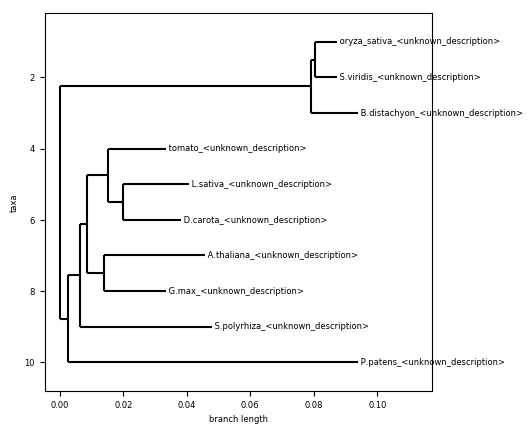

In [141]:
draw_tree('./alignment_prank_result/atpA.best.dnd')

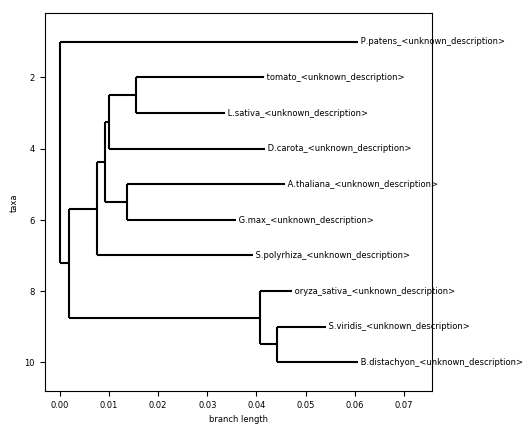

In [142]:
draw_tree('./alignment_prank_result/atpB.best.dnd')

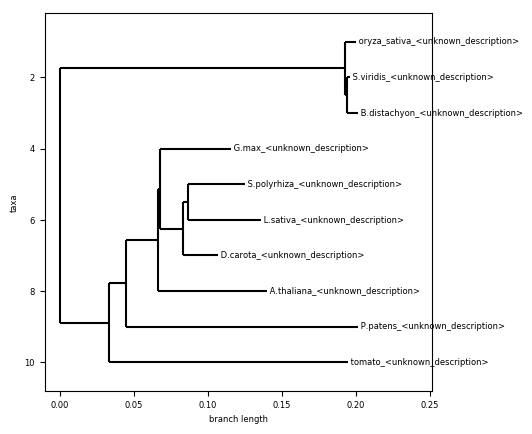

In [143]:
draw_tree('./alignment_prank_result/clpP.best.dnd')

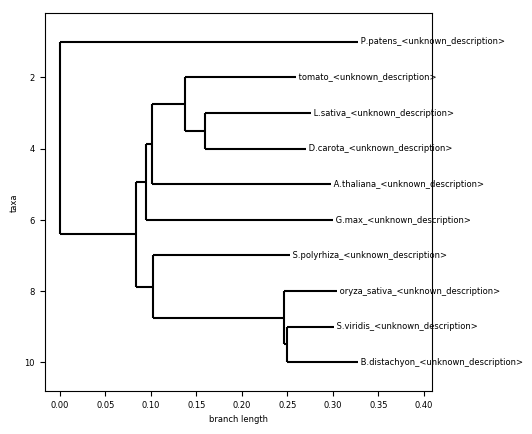

In [144]:
draw_tree('./alignment_prank_result/matK.best.dnd')

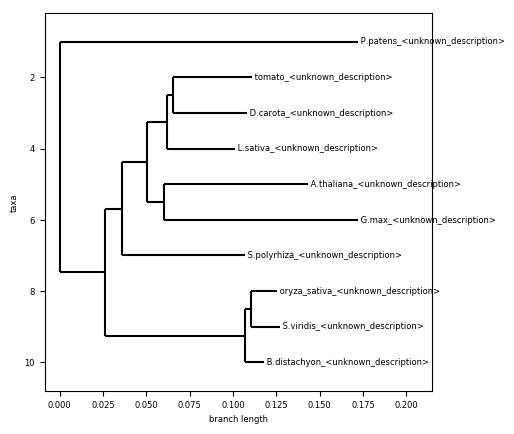

In [145]:
draw_tree('./alignment_prank_result/ndhD.best.dnd')

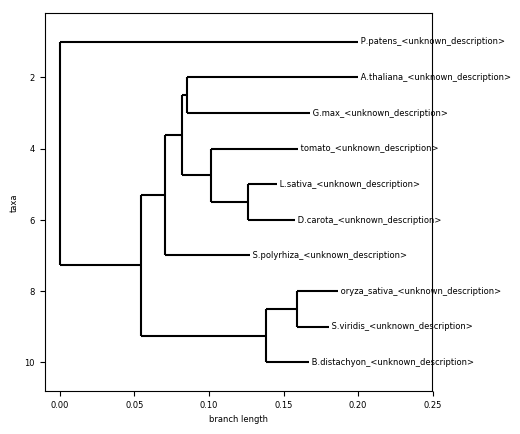

In [146]:
draw_tree('./alignment_prank_result/psbK.best.dnd')

---